# Data Science Final Project
# Telecom Industry Analysis Using Social Media Feeds
#### By: 
>Abhijit Londhe<br>
>Juhi Srivastava<br>
>Ridhima Budhwar<br>
>Sagar Gupta<br>



## 1. Introduction 
>The modern day telecom warfare depends on acquiring customers, retaining customers and getting out more business out of them. So the traditional methods of contacting customers by phone, addressing customer grievances when they physically come to your outlet is a thing of the past. One of the most heavily used medium to gauge customer sentiment about a particular brand is social media.

>The idea of the project is to pull data from all social media data sources like Facebook, Twitter, Reddit, Blogs, etc and analyze what the customers are saying about leading telecom brands on social media. After gathering this information from different social media sources and cleaning them, we apply data mining techniques like Classification, Association analysis, text Mining, sentiment Analysis.

>> ### Questions at hand:
>>> A. In which major areas of telecom industries do customers face maximum issues? <br>
>>> B. Identify which telecom company can be most profitable to partner with for mobile device companies? <BR>
>>> C. Identify customers of which telecom company are the most and least satisfied. <br>  

## 2. Dataset:
>The dataset set used includes the Attributes – Platform, Text, Country, Region, City, Brand.
Hoot suite (uberVU) uses web crawler to extract the data from different social media sources.
The dataset contains 10519 rows before pre processing. 

>After cleaning data in R and Excel, we reduced the dataset to 1009 rows. Removed missing values and non informative rows.  

## 3. Data Cleaning and Classification using R

### 3.1. Data Cleaning

Cleaning of Text data (Unstructured data) is very important and complicated. The major task in text mining is to find the relevant information that will help in the analysis. To do so, we first have to get rid of the unnecessary information. For this project we cleaned the data by removing:

>A. Usernames (eg. @DonalTrump) <BR>
>B. Punctuations<BR>
>C. Numbers<BR>
>D. links<BR>
>E. Spaces<BR>
>F. Stopwords (default) <BR>

>### 3.1.1. Snippet of the R Code for data cleaning and stemming

>>mydata$Content = gsub("@\\w+", "", mydata$Content) <br>
>>mydata$Content = gsub("[[:punct:]]", "",mydata$Content)<br> 
>>mydata$Content = gsub("[[:digit:]]", "", mydata$Content) <br>
>>mydata$Content = gsub("http\\w+", "", mydata$Content) <br>
>>mydata$Content = gsub("[ \t]{2,}", "", mydata$Content) <br>
>>mydata$Content = gsub("^\\s+|\\s+$", "", mydata$Content) <br>

>#### An example of cleaned data is shown below.

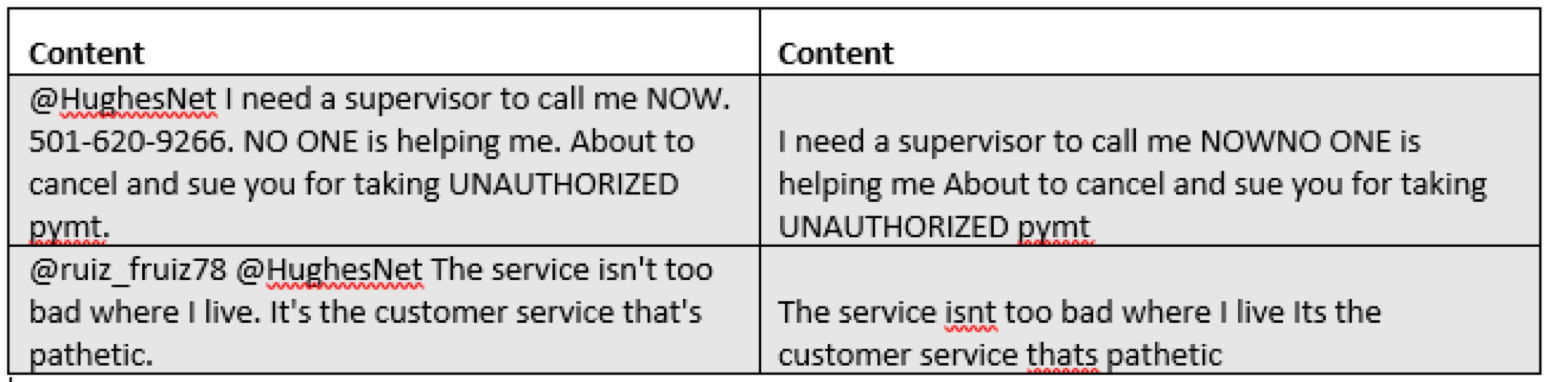

In [49]:
from IPython.display import Image
Image(filename='/Users/juhi/Desktop/Cleaning.png')

### 3.2. Data Classification using Sentiment Analysis

We performed sentiment analysis, using the R package sentiment by Timothy Jurka. This package contains two handy functions:

>classify_emotion
>>This function helps analyze some text and classify it in different types of emotion. We performed the classification using two algorithms: naive Bayes and simple voter procedure.

>>#### Using classify_emotion fuction, we categorized emotion of users in 6 categories:
>>>A. Surprise <br>
>>>B. Sad<br>
>>>C. Anger<br>
>>>D. Joy<br>
>>>E. Disgust<br>
>>>F. Fear<br>

>classify_polarity
>>In contrast to the classification of emotions, the classify_polarity function allows us to classify some text as positive or negative. In this case also we used the naive Bayes and simple voter algorithm.

>>#### Using classify polarity fuction, we classified the customer feeds in 3 categories:
>>>1. Positive
>>>2. Negative
>>>3. Neutral


>### 3.2.1. Snippet of the R Code for Sentiment Analysis

>#### Code to classify emotion  (Naive Bayes) 
>> class_emo = classify_emotion(mydata$Content, algorithm="bayes", prior=1.0) 

>#### Code to get emotion best fit 
>> emotion = class_emo[,7]

>#### Code to classify emotion (Simple Votor Method)
>> class_emo = classify_emotion(mydata$Content, algorithm=“voter", prior=1.0) 

>#### Code to get emotion best fit  
>> emotion = class_emo[,7]

>#### Code to classify polarity (Naive Bayes)
>> class_pol = classify_polarity(mydata$Content, algorithm="bayes")  

>#### Code to get polarity best fit 
>> polarity = class_pol[,4]

>#### Code to classify polarity (Simple Voter Method)
>> class_pol = classify_polarity(mydata$Content, algorithm=“voter")  

>#### Code to get polarity best fit
>> polarity = class_pol[,4]

## 4. Data Analysis in iPython
>After cleaning and classifying the data in R, we exported the clean data into a csv file, which was further used for data analysis using Python libraries. 

>### 4.1. Import libraries

In [51]:
import pandas as pd
import numpy as np
import lxml as sd
import html5lib as hlib
import seaborn as sa
#import numexpr as num
import matplotlib.pyplot as plt
from matplotlib import cm
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.plotting import figure, show
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

>### 4.2. Data Processing:
### 4.2.1 Importing the Cleaned Data into DataFrame

In [22]:
import csv

path =  '/Users/juhi/Semester 2/Data Science/Final Project/CleanData.csv'

with open(path, 'r') as infile, open(path+"final.csv", 'w') as outfile:
     inputs = csv.reader(infile)
     output = csv.writer(outfile)

     for index, row in enumerate(inputs):
         output.writerow(row)
        
df = pd.read_csv("/Users/juhi/Semester 2/Data Science/Final Project/CleanData.csvfinal.csv")
df.head()

,Unnamed: 0,Date..GMT.,Platform,Author.Name,Author.URL,Author.Gender,Reach,Country,Region,City,...,Sentiment_Nived,Sentiment,URL,Published..GMT.,Tags,Brand,polarity,Unnamed: 19,emotion,polarity.1
0,1,4/24/2015,twitter,kathleen morgan,http://twitter.com/kmacmor,f,XS,united states,california,san diego,...,negative,negative,http://twitter.com/kmacmor/status/591430538906...,4/24/2015 2:36,NaN,Hughes,NaN,NaN,joy,positive
1,2,4/22/2015,twitter,Casey Cobb,http://twitter.com/Ccobb90,u,S,united states,virginia,lynchburg,...,negative,neutral,http://twitter.com/Ccobb90/status/590983788915...,4/22/2015 21:01,NaN,Hughes,NaN,NaN,NaN,positive
2,3,4/17/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,negative,neutral,http://twitter.com/hogwired08/status/589146706...,4/17/2015 19:21,NaN,Hughes,NaN,NaN,NaN,negative
3,4,4/17/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,neutral,negative,http://twitter.com/hogwired08/status/589030107...,4/17/2015 11:38,NaN,Hughes,NaN,NaN,sadness,negative
4,5,4/16/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,negative,negative,http://twitter.com/hogwired08/status/588762150...,4/16/2015 17:53,NaN,Hughes,NaN,NaN,anger,negative


>### 4.2.2. Creating an emotionKey for each emotion and filling the Null entries

In [23]:
df['emotionKey'] = df['emotion'] #creating one extra column to define number for each emotion
df['emotionKey'].fillna(0, inplace=True) #filling NA values with '0'

df.head()

,Unnamed: 0,Date..GMT.,Platform,Author.Name,Author.URL,Author.Gender,Reach,Country,Region,City,...,Sentiment,URL,Published..GMT.,Tags,Brand,polarity,Unnamed: 19,emotion,polarity.1,emotionKey
0,1,4/24/2015,twitter,kathleen morgan,http://twitter.com/kmacmor,f,XS,united states,california,san diego,...,negative,http://twitter.com/kmacmor/status/591430538906...,4/24/2015 2:36,NaN,Hughes,NaN,NaN,joy,positive,joy
1,2,4/22/2015,twitter,Casey Cobb,http://twitter.com/Ccobb90,u,S,united states,virginia,lynchburg,...,neutral,http://twitter.com/Ccobb90/status/590983788915...,4/22/2015 21:01,NaN,Hughes,NaN,NaN,NaN,positive,0
2,3,4/17/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,neutral,http://twitter.com/hogwired08/status/589146706...,4/17/2015 19:21,NaN,Hughes,NaN,NaN,NaN,negative,0
3,4,4/17/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,negative,http://twitter.com/hogwired08/status/589030107...,4/17/2015 11:38,NaN,Hughes,NaN,NaN,sadness,negative,sadness
4,5,4/16/2015,twitter,Will the Thrill,http://twitter.com/hogwired08,m,L,united states,arkansas,hot springs,...,negative,http://twitter.com/hogwired08/status/588762150...,4/16/2015 17:53,NaN,Hughes,NaN,NaN,anger,negative,anger


>### 4.2.3. Creating keys for each emotion, to ensure that it can be plotted
>#### Assigning key for each emotion
>>1 - Fear<br>
2 - Anger<br> 
3 - Sadness<br> 
4 - Surprise<br> 
5 - Joy<br> 
6 - Disgust<br>

In [52]:
df2 = df[['Brand', 'emotionKey', 'emotion']] #creating dataframe with three columns

# Disgust - 6, Joy - 5, Surprise - 4, Sadness - 3, Anger - 2, Fear - 1
# assigning keys to each emotion 
df2.loc[df['emotionKey'] == 'disgust', 'emotionKey'] = '6'
df2.loc[df['emotionKey'] == 'joy', 'emotionKey'] = '5'
df2.loc[df['emotionKey'] == 'surprise', 'emotionKey'] = '4'
df2.loc[df['emotionKey'] == 'sadness', 'emotionKey'] = '3'
df2.loc[df['emotionKey'] == 'anger', 'emotionKey'] = '2'
df2.loc[df['emotionKey'] == 'fear', 'emotionKey'] = '1'


df2["emotionKey"] = df2["emotionKey"].astype(int)
df2.head()

,Brand,emotionKey,emotion
0,Hughes,5,joy
1,Hughes,0,NaN
2,Hughes,0,NaN
3,Hughes,3,sadness
4,Hughes,2,anger


>### 4.2.4. Mining only the data for which emotion Key is not null

In [50]:
# Removing 0s
df3 = df2[df2.emotionKey != 0]
df3.head()

,Brand,emotionKey,emotion
0,Hughes,5,joy
3,Hughes,3,sadness
4,Hughes,2,anger
7,Hughes,1,fear
10,Hughes,3,sadness


>### 4.2.4. Getting the total number of values for each brand
> By looking at the total number of feeds for each service provider, it is evident that the data is not normally distributed. 
So, we will use this information to calculate percentage of each emotion to derive meaningful data interpretation.

In [26]:
dft = df3['Brand'].value_counts()
dft

CenturyLink    224
AT&T            39
Verizon         20
Hughes          15
ClearWire        5
WildBlue         5
Name: Brand, dtype: int64

>## 4.3. Data Interpretation and Visualization: 
>### 4.3.1. Abstracting a funtion to create a dataframe from a map (dictionary within a dictionary). 
>> We will use this fuction to create two (2) dataframe(s): 
>>>A. brandname and emotion percentage <br>
>>>B. brandname and sentiment percentage

In [27]:
def getDataFrameFromMap(in_map):   
    temp_list=[]
    index=0
    df_temp=list(in_map['AT&T'].keys())
    df_temp.insert(0, 'Brand')
    brands= in_map.keys()

    for i in in_map.values():
        temp = list(i.values())
        temp.insert(0, brands[index])
        temp_list.append(temp)
        index +=1

    df = pd.DataFrame(temp_list, index=[1,2,3,4,5,6], columns=df_temp).set_index('Brand')
    return df

>>### DataFrame A: (Brandname and Emotion percentage)

In [28]:
number_emotion = {'AT&T':{'joy':0, 'sadness':0, 'anger':0, 'fear':0, 'surprise':0, 'disgust':0},'Hughes':{'joy':0, 'sadness':0, 'anger':0, 'fear':0, 'surprise':0, 'disgust':0},
             'WildBlue':{'joy':0, 'sadness':0, 'anger':0, 'fear':0, 'surprise':0, 'disgust':0},'Verizon':{'joy':0, 'sadness':0, 'anger':0, 'fear':0, 'surprise':0, 'disgust':0},
             'CenturyLink':{'joy':0, 'sadness':0, 'anger':0, 'fear':0, 'surprise':0, 'disgust':0},'ClearWire':{'joy':0, 'sadness':0, 'anger':0, 'fear':0, 'surprise':0, 'disgust':0}}

total_entries = {'CenturyLink': 224,'AT&T': 39,'Verizon': 20,'Hughes': 15,'ClearWire': 5, 'WildBlue':5}

for i,r in df3.iterrows():
    if(r['emotion'] is not np.nan):
        number_emotion[r['Brand']][r['emotion']] += 1

for key, value in number_emotion.iteritems():
    total = total_entries[key]
    value['joy'] = round((float(value['joy'])/total) * 100, 2)
    value['sadness'] = round((float(value['sadness'])/total) * 100, 2)
    value['anger'] = round((float(value['anger'])/total) * 100, 2)
    value['fear'] = round((float(value['fear'])/total) * 100, 2)
    value['surprise'] = round((float(value['surprise'])/total) * 100, 2)    
    value['disgust'] = round((float(value['disgust'])/total) * 100, 2)
    
print number_emotion

df_emotion = getDataFrameFromMap(number_emotion)
df_emotion

{'Hughes': {'joy': 20.0, 'sadness': 33.33, 'disgust': 0.0, 'anger': 33.33, 'surprise': 0.0, 'fear': 13.33}, 'Verizon': {'joy': 55.0, 'sadness': 10.0, 'disgust': 0.0, 'anger': 20.0, 'surprise': 5.0, 'fear': 10.0}, 'WildBlue': {'joy': 20.0, 'sadness': 60.0, 'disgust': 0.0, 'anger': 0.0, 'surprise': 0.0, 'fear': 20.0}, 'ClearWire': {'joy': 80.0, 'sadness': 20.0, 'disgust': 0.0, 'anger': 0.0, 'surprise': 0.0, 'fear': 0.0}, 'AT&T': {'joy': 33.33, 'sadness': 35.9, 'disgust': 5.13, 'anger': 17.95, 'surprise': 5.13, 'fear': 2.56}, 'CenturyLink': {'joy': 49.11, 'sadness': 25.0, 'disgust': 2.23, 'anger': 11.61, 'surprise': 3.13, 'fear': 8.93}}


,joy,sadness,disgust,anger,surprise,fear
Brand,,,,,,
Hughes,20.00,33.33,0.00,33.33,0.00,13.33
Verizon,55.00,10.00,0.00,20.00,5.00,10.00
WildBlue,20.00,60.00,0.00,0.00,0.00,20.00
ClearWire,80.00,20.00,0.00,0.00,0.00,0.00
AT&T,33.33,35.90,5.13,17.95,5.13,2.56
CenturyLink,49.11,25.00,2.23,11.61,3.13,8.93


>>### Plotting DataFrame A.
#### The plot below shows us the percentage of response for each brand categorized in emotion

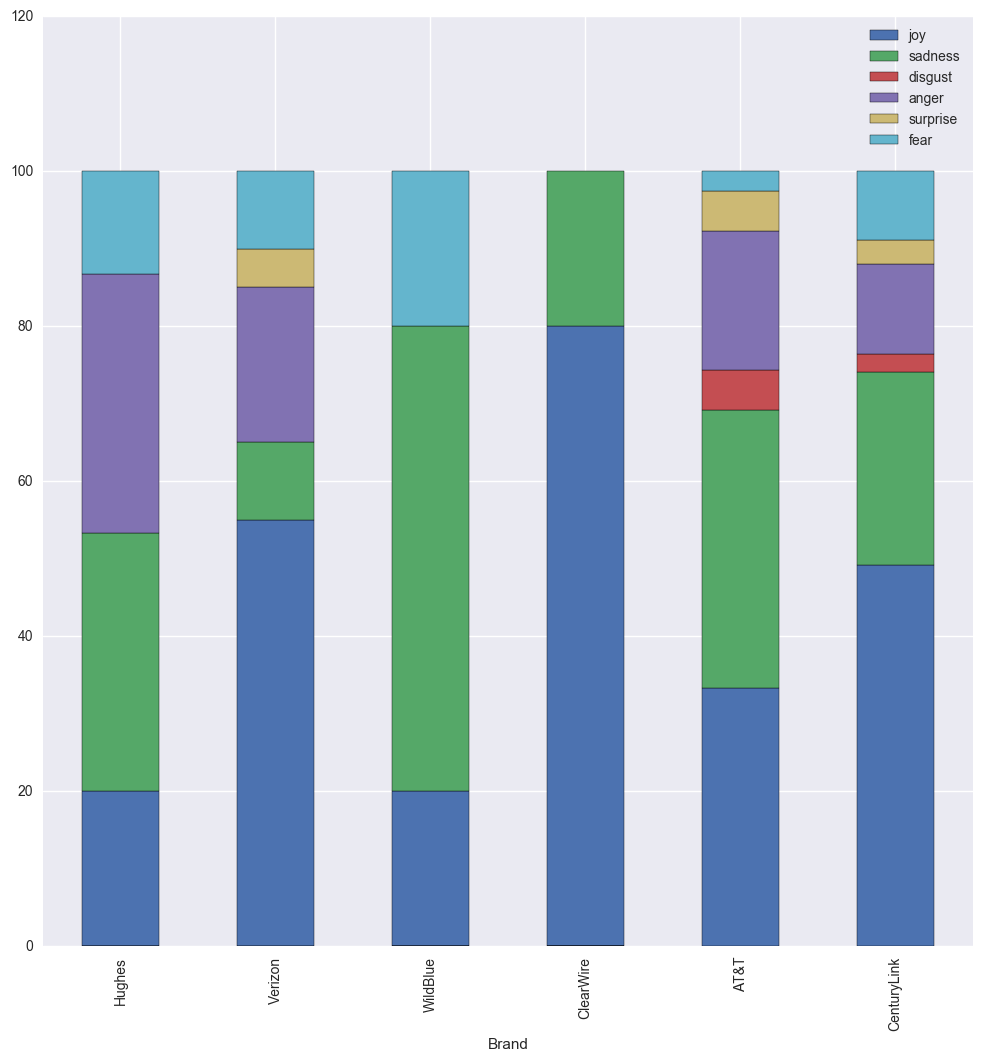

In [29]:
df_emotion.transpose().T.plot.bar(stacked=True, figsize=(12,12));

>>### Graph Inference:

>>#### From the graph above, it can be inferred that: 
More than 50% of Clearwire, Verizon and CenturyLink feeds are associated with Joy emotion. <br>
It also apears that maximum proportion of Wildblue customers are sad :( and Maximum proportion of Hughes customer are angry! :S

>>### Usage of inference: 
A. On the basis of this analysis, mobile device company can think of increasing their contracts with Clearwire, Verizon and CenturyLink<br>
B. It can also be assumed that the Wildblue and Hughes customers are least satisfied. 

>>### Dataframe B: Brandname and Emotion percentage
>>### Step 1. Creating Sentiment dataframe for each brand instead of emotion

In [30]:
df4 = df[['Brand', 'Sentiment']]
df4.head()

,Brand,Sentiment
0,Hughes,negative
1,Hughes,neutral
2,Hughes,neutral
3,Hughes,negative
4,Hughes,negative


>>### Step 2. Creating dataframe with percentage of negative, positive and neutral sentiment for each brand

In [31]:
number_sentiment = {'AT&T':{'neutral':0, 'positive':0, 'negative':0},'Hughes':{'neutral':0, 'positive':0, 'negative':0},
             'WildBlue':{'neutral':0, 'positive':0, 'negative':0},'Verizon':{'neutral':0, 'positive':0, 'negative':0},
             'CenturyLink':{'neutral':0, 'positive':0, 'negative':0},'ClearWire':{'neutral':0, 'positive':0, 'negative':0}}

for i,r in df4.iterrows():
    if(r['Sentiment'] is not np.nan):
        number_sentiment[r['Brand']][r['Sentiment']] += 1

for key, value in number_sentiment.iteritems():
    total = float(value['neutral']) + float(value['positive']) + float(value['negative'])
    value['neutral'] = round((float(value['neutral'])/total) * 100, 2)
    value['positive'] = round((float(value['positive'])/total) * 100, 2)
    value['negative'] = round((float(value['negative'])/total) * 100, 2)

print number_sentiment

df_sentiment = getDataFrameFromMap(number_sentiment)
df_sentiment

{'Hughes': {'positive': 11.43, 'neutral': 28.57, 'negative': 60.0}, 'Verizon': {'positive': 31.94, 'neutral': 56.94, 'negative': 11.11}, 'WildBlue': {'positive': 20.0, 'neutral': 66.67, 'negative': 13.33}, 'ClearWire': {'positive': 27.27, 'neutral': 36.36, 'negative': 36.36}, 'AT&T': {'positive': 26.56, 'neutral': 44.53, 'negative': 28.91}, 'CenturyLink': {'positive': 17.07, 'neutral': 61.11, 'negative': 21.82}}


,positive,neutral,negative
Brand,,,
Hughes,11.43,28.57,60.00
Verizon,31.94,56.94,11.11
WildBlue,20.00,66.67,13.33
ClearWire,27.27,36.36,36.36
AT&T,26.56,44.53,28.91
CenturyLink,17.07,61.11,21.82


>>### Plotting DataFrame B.
#### The plot below shows us the percentage each sentiment type for each brand

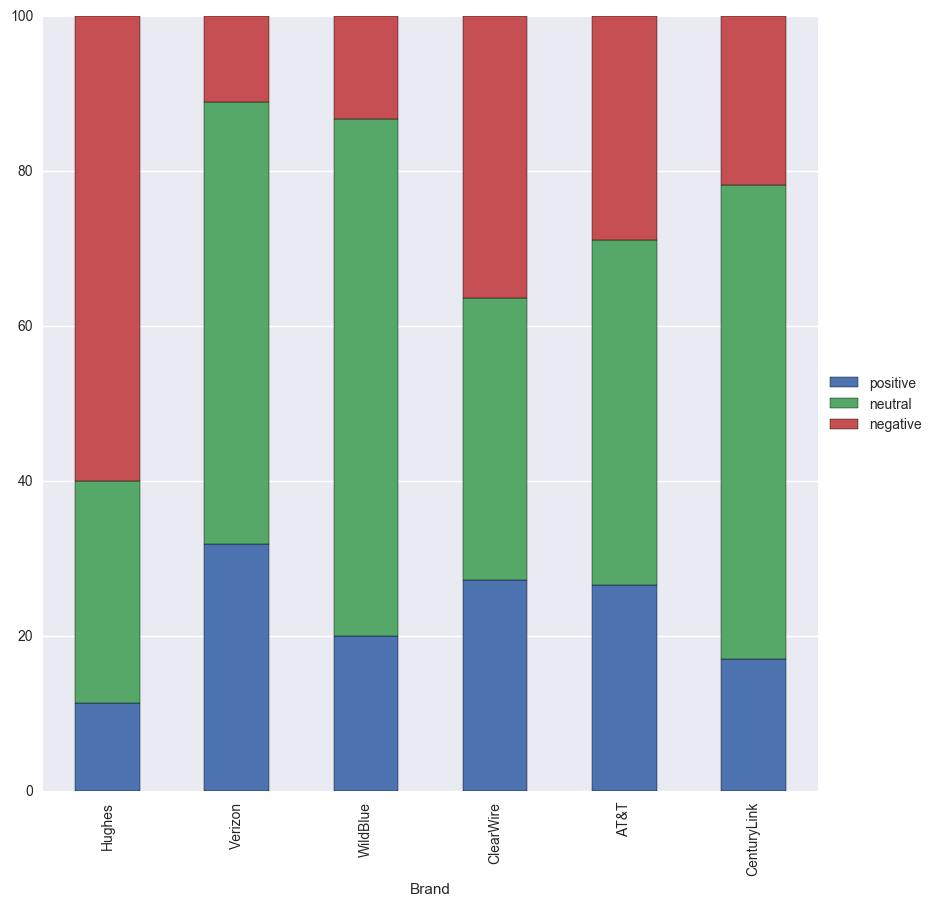

In [46]:
# df_sentiment.transpose().T.plot.bar(stacked=True, figsize=(8,8))
df_sentiment.transpose().T.plot.bar(stacked=True, figsize=(10,10));
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

>>### Graph Inference:


>>#### From the graph above, it can be inferred that:
Maximum proportion of feeds for Hughes are negative, while maximum proportion of feeds for Verizon are Positive.


>>### Usage of inference:
This graph can be used to cross validate the findings from the previous graph. 
As per graph 1, 80% of Clearwire feeds were of 'Joy' emotion, whereas in graph 2 we can see that 36.36% of feeds were labeled as negative and 27.27% of feeds were positve.

>> *Reason for discrepancy:* It cannot be assumed for sure that the data interpretation from both the graphs is not same because:
1. The algorithm used in the 2nd graph , classified some of the joy feeds as neutral.
2. Algorithm used in 1st graph classified some of the sarcastic feeds as joy.
One thing that is for sure is that there is a need for further detailed analysis, the scope of which will be discussed in the conclusion section of this project.


>### 4.3.2. WordCloud to Analyse Negative feedbacks

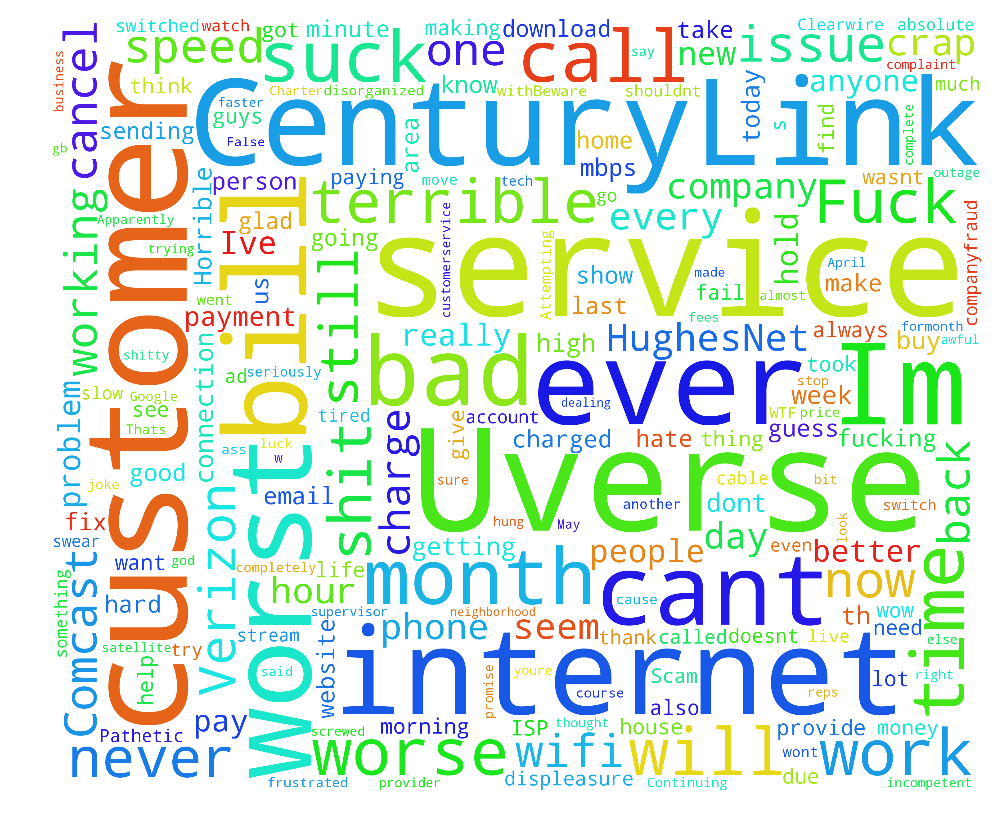

In [39]:
from wordcloud import WordCloud,STOPWORDS

df_wc=df[df['Sentiment']=='negative']
words = ' '.join(df_wc['Content'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'ATT'
                                and word != 'centurylink'
                                and word != 'RT'
                            ])

wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

>>### WordCloud Inference:


>>#### From the wordCloud above, it can be inferred that:
Tweets with negative sentiment are frequently involved with some words like service, bill ,customer or internet. 


>>### Usage of inference:
We can assume that customer tends to complain when they are trying to reach customer service, billing etc.


## 5. Conclusion

>### 5.1. Future Scope 
>> A. Joining this dataset with customer dataset to segment the customers according to money spent and income to derive marketing strategies. <br>
>> B. Sarcasm detection in unstructured data using Natural Language Processing. <br> <br>
>>>Sarcasm detection Method:<br>  	
a. Lexical Analysis<br> 
b. Prediction using likes and dislikes<br> 
c. Fact negation<br> 
d. Temporal Knowledge extraction<br> 

>### 5.2. Key Challenges
>>A. Most of the data was not rich in attributes so we had to skim a lot data. <br>
>>B. Sarcasm was not being detected, NLP is required for it <br> 
>>C. Unable to cluster the dataset properly based on similarity. <br>

